In [1]:
import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from scout.niche import randomly_sample
from scout.cyto import profiles_to_features

Load UMAP model and analysis dataframe

In [2]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/'
os.listdir(working_dir)

['example_roi_Adjacent.pdf',
 'ventricle_celltype_fractions_arlotta.pdf',
 'arlotta_with_FC.xlsx',
 'example_roi_TBR1-rich.pdf',
 'average_profile_TBR1-LowDN.pdf',
 'average_profile_TBR1-HighDN.pdf',
 'example_roi_Surface.pdf',
 'Lancaster_d60',
 'example_roi_DN.pdf',
 'cyto_profiles_combined.npy',
 'average_profile_DN.pdf',
 'average_profile_TBR1-rich.pdf',
 'analysis.csv',
 'cyto_clusters_umap.pdf',
 'ventricle_celltype_fractions_lancaster.pdf',
 'average_profile_Surface.pdf',
 'variance_ratio_histogram.pdf',
 'example_roi_TBR1-HighDN.pdf',
 'cyto_profiles_combined_samples.npy',
 'example_roi_TBR1-LowDN.pdf',
 'clustermap_zika_hits.pdf',
 'cyto_arlotta_umap.pdf',
 'volcano_plot_arlotta..pdf',
 'clustermap_arlotta_hits.pdf',
 'cyto_labels_combined.npy',
 'average_profile_Adjacent.pdf',
 'combined_features.xlsx',
 'Arlotta_d56',
 'model_arlotta.umap']

In [3]:
umap = joblib.load(os.path.join(working_dir, 'model_arlotta.umap'))
analysis = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)
analysis.head()

,type
path,
20190722_16_28_25_ef26_org1_488LP15_561LP140_642LP40,Arlotta_d56
20190722_17_48_57_ef26_org2_488LP14_561LP140_642LP40,Arlotta_d56
20190722_18_32_43_ef26_org3_488LP14_561LP140_642LP40,Arlotta_d56
20190722_19_18_01_ef26_org4_488LP14_561LP140_642LP40,Arlotta_d56
20190723_11_41_12_ef26_org5_488LP14_561LP140_642LP40,Arlotta_d56


Get all profiles and labels

In [4]:
n = 1000

np.random.seed(1)
dfs = []
for org in tqdm(analysis.index, total=len(analysis)):
    folder = analysis['type'].loc[org]
    org_dir = os.path.join(working_dir, folder, org)
    profiles = np.load(os.path.join(org_dir, 'dataset/cyto_profiles_sample.npy'))
    labels = np.load(os.path.join(org_dir, 'cyto_labels.npy'))
    profiles_sample, labels_sample = randomly_sample(n, profiles, labels)
    x = umap.transform(profiles_sample.reshape((len(profiles_sample), -1)))
    df = pd.DataFrame({'x': x[:, 0], 
                       'y': x[:, 1],
                       'label': labels_sample,
                       'organoid': len(x) * [org], 
                       'type': len(x) * [folder]})
    dfs.append(df)
df = pd.concat(dfs)
df.head()

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../.conda/envs/scout/lib/python3.6/site-packages/umap/nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  self.func_ir.loc))
/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../.conda/envs/scout/lib/python3.6/site-packag

,x,y,label,organoid,type
0,5.846986,-2.941170,0,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,Arlotta_d56
1,-1.271403,-5.715168,3,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,Arlotta_d56
2,-2.510379,6.543469,2,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,Arlotta_d56
3,1.031749,-1.788606,2,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,Arlotta_d56
4,0.747122,-2.247050,0,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,Arlotta_d56


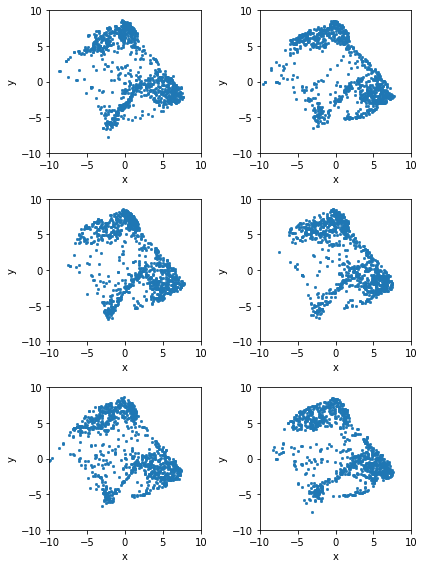

In [25]:

plt.figure(figsize=(6, 8))
for i in range(6):
    df_org = df.iloc[i*n:(i+1)*n]
    x = df_org['x']
    y = df_org['y']
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=x, y=y, edgecolor=None, s=5)
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
plt.tight_layout()
plt.show()

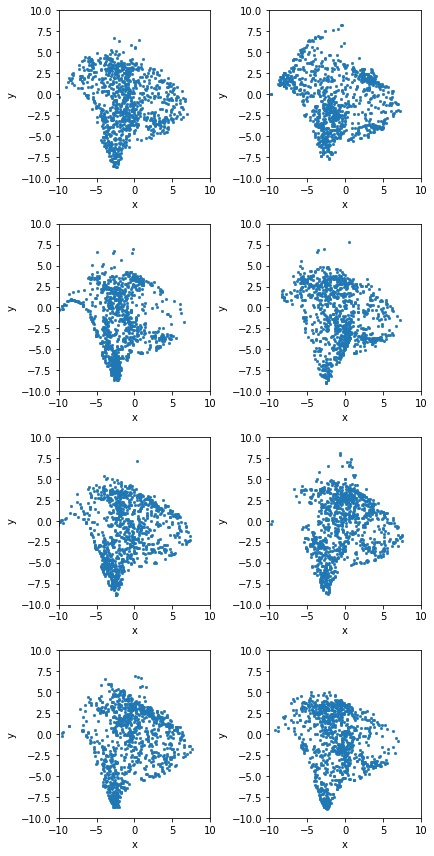

In [29]:
plt.figure(figsize=(6, 12))
for i in range(8):
    df_org = df.iloc[i*n+6*n:(i+1)*n+6*n]
    x = df_org['x']
    y = df_org['y']
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x=x, y=y, edgecolor=None, s=5)
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
plt.tight_layout()
plt.show()

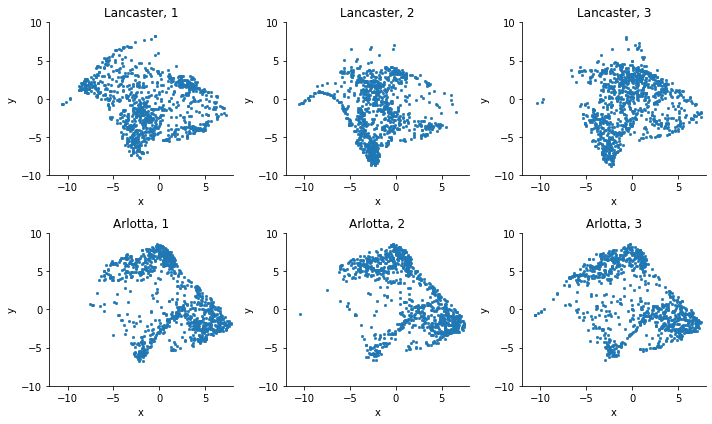

In [45]:
lancaster_orgs = [1, 2, 5]
arlotta_orgs = [2, 3, 4]

plt.figure(figsize=(10, 6))
for i, org in enumerate(lancaster_orgs):
    start = org * n + 6*n
    stop = (org+1) * n + 6*n
    
    df_org = df.iloc[start:stop]
    x = df_org['x']
    y = df_org['y']
    
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=x, y=y, edgecolor=None, s=5)
    plt.title(f'Lancaster, {i+1}')
    plt.ylim([-10, 10])
    plt.xlim([-12, 8])
    
for i, org in enumerate(arlotta_orgs):
    start = org * n
    stop = (org+1) * n
    
    df_org = df.iloc[start:stop]
    x = df_org['x']
    y = df_org['y']
    
    plt.subplot(2, 3, i+1+3)
    sns.scatterplot(x=x, y=y, edgecolor=None, s=5)
    plt.title(f'Arlotta, {i+1}')
    plt.ylim([-10, 10])
    plt.xlim([-12, 8])
    
sns.despine()
plt.tight_layout()
plt.show()

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


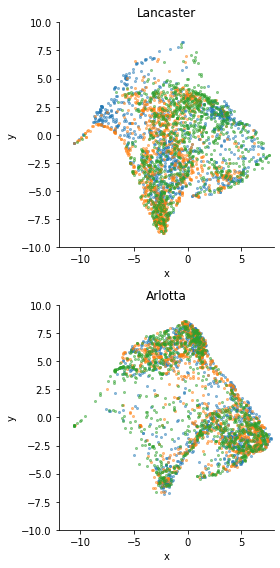

In [51]:
lancaster_orgs = [1, 2, 5]
arlotta_orgs = [2, 3, 4]

plt.figure(figsize=(4, 8))
for i, org in enumerate(lancaster_orgs):
    start = org * n + 6*n
    stop = (org+1) * n + 6*n
    
    df_org = df.iloc[start:stop]
    x = df_org['x']
    y = df_org['y']
    
    plt.subplot(2, 1, 1)
    sns.scatterplot(x=x, y=y, edgecolor=None, s=5, alpha=0.5)
    plt.title(f'Lancaster')
    plt.ylim([-10, 10])
    plt.xlim([-12, 8])
    
for i, org in enumerate(arlotta_orgs):
    start = org * n
    stop = (org+1) * n
    
    df_org = df.iloc[start:stop]
    x = df_org['x']
    y = df_org['y']
    
    plt.subplot(2, 1, 2)
    sns.scatterplot(x=x, y=y, edgecolor=None, s=5, alpha=0.5)
    plt.title(f'Arlotta')
    plt.ylim([-10, 10])
    plt.xlim([-12, 8])
    
sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(working_dir, 'umap_arlotta_consistency.pdf'), bbox_inches='tight')
plt.show()

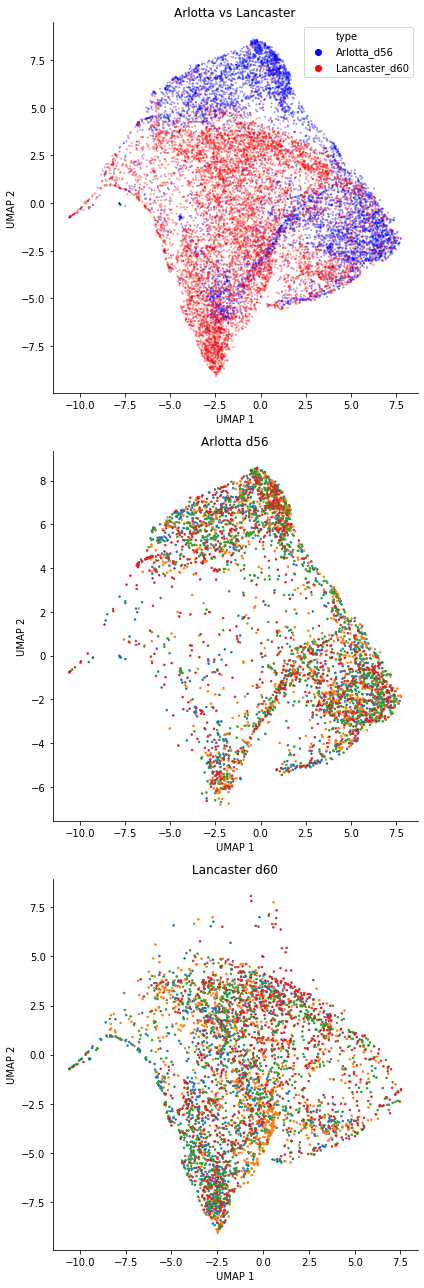

In [8]:
n_orgs = 4

plt.figure(figsize=(6, 18))

plt.subplot(3, 1, 1)
sns.scatterplot(x='x', y='y', hue='type', data=df, edgecolor=None, s=2, alpha=0.3, palette=['b', 'r'])
plt.title('Arlotta vs Lancaster')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.subplot(3, 1, 2)
sns.scatterplot(x='x', y='y', hue='organoid', data=df.where(df['type'] == 'Arlotta_d56').dropna().iloc[1*n:(n_orgs+1)*n], 
                edgecolor=None, s=3, alpha=1, legend=None)
plt.title('Arlotta d56')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.subplot(3, 1, 3)
sns.scatterplot(x='x', y='y', hue='organoid', data=df.where(df['type'] == 'Lancaster_d60').dropna().iloc[2*n:(n_orgs+2)*n], 
                edgecolor=None, s=3, alpha=1, legend=None)
plt.title('Lancaster d60')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.tight_layout()
sns.despine()
plt.savefig(os.path.join(working_dir, 'umap_arlotta_vs_lancaster.pdf'), bbox_inches='tight')
plt.show()